predict ?

72 
auswahl an anweisungen die immer bei einembefehl ausgeführt werden???

return x

2.12 ND 2,3,4 ??? wie sehen diese Autos aus

append?

12: add a small number to diagonal 


HOMEWORK

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data -O car_fuel_efficiency.csv

--2025-10-02 21:56:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 
200 OKequest sent, awaiting response... 
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.09s   

2025-10-02 21:56:19 (9.01 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

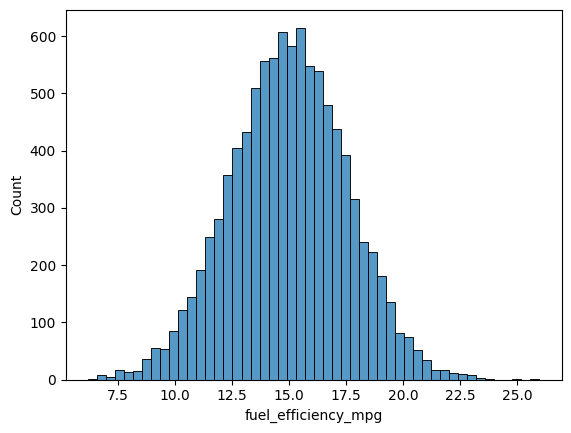

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail? NO

### Question 1
There's one column with missing values. What is it?

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

'horsepower'

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [9]:
df['horsepower'].median()

149.0

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [10]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n

9704

In [12]:
'''df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]'''

'df_train = df.iloc[:n_train]\ndf_val = df.iloc[n_train:n_train+n_val]\ndf_test = df.iloc[n_train+n_val:]'

Datenset gesplittet 60/20/20

In [13]:
idx = np.arange(n)

In [14]:
np.random.seed(42)

np.random.shuffle(idx)


Datenset geshuffelt

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?


In [17]:
df_0 = df.fillna(0)

fehlende Werte durch Null ersetzt und Fkt als df_0 definiert

In [18]:
df_mean = df.fillna(df_train.horsepower.mean())

fehlende Werte durch mean des trainingsdatensets von horsepower ersetzt und Fkt als df_mean definiert


Ein Modell mit linearer Regression trainieren mit fehlenden Werten = 0:

In [19]:
df_0_train = df_0.iloc[idx[:n_train]]
df_0_val = df_0.iloc[idx[n_train:n_train+n_val]]
df_0_test = df_0.iloc[idx[n_train+n_val:]]

df_mean_train = df_mean.iloc[idx[:n_train]]
df_mean_val = df_mean.iloc[idx[n_train:n_train+n_val]]
df_mean_test = df_mean.iloc[idx[n_train+n_val:]]

In [20]:
def train_test_val_split(df, idx):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test

In [21]:
df_0_train, df_0_val, df_0_test = train_test_val_split(df_0, idx)
df_mean_train, df_mean_val, df_mean_test = train_test_val_split(df_mean, idx)

In [22]:
def X_y_split(df):
    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    
    X = df[base]
    y = df['fuel_efficiency_mpg']
    
    return np.array(X), np.array(y)

In [23]:
X_0_train, y_0_train = X_y_split(df_0_train)
X_0_val, y_0_val = X_y_split(df_0_val)
X_0_test, y_0_test = X_y_split(df_0_test)

X_mean_train, y_mean_train = X_y_split(df_mean_train)
X_mean_val, y_mean_val = X_y_split(df_mean_val)
X_mean_test, y_mean_test = X_y_split(df_mean_test)

#X_0_train, y_0_train,X_0_val, y_0_val, X_0_test, y_0_test, X_mean_train, y_0_train, X_mean_val, y_0_val, X_mean_test, y_0_test

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [27]:
w_0_0, w_0 = train_linear_regression(X_0_train, y_0_train)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_mean_train)

In [33]:
y_0_pred = w_0_0 + X_0_train.dot(w_0)
y_mean_pred = w_0_mean + X_mean_train.dot(w_mean)

y_0_pred_val = w_0_0 + X_0_val.dot(w_0)
y_mean_pred_val = w_0_mean + X_0_val.dot(w_mean)

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
w

In [ ]:
w_0

In [ ]:
plt.figure(figsize=(6, 6))

sns.histplot(y_0_train, label='target', color='red', alpha=1, bins=50)
sns.histplot(y_0_pred, label='prediction', color='blue', alpha=1, bins=50)

plt.legend()

plt.ylabel('fuel_efficiency_mpg')
plt.xlabel('Log(??? + 1)')
plt.title('fehlende Werte Null')


plt.show()

In [ ]:
def prepare_X(df_0_train):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

In [ ]:
X_0_val = prepare_X(df_0_val)
y_pred = w0 + X_0_val.dot(w)

In [ ]:
X_0_train = prepare_X(df_0_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
ab hier jetzt mit mean geplant:

In [ ]:
df_mean_train = df.iloc[idx[:n_train]]
df_mean_val = df.iloc[idx[n_train:n_train+n_val]]
df_mean_test = df.iloc[idx[n_train+n_val:]]


In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]